Alumno: Luciano Benjamin Recalde Carballo
# Analisis y Prediccion de Precios de Autos

Cargamos los datos

In [1]:
import pandas as pd
ds_path = "data/Automobile_data.csv"
df = pd.read_csv(ds_path)

Revisamos la estructura de los mismos.

Iniciamos con la cabecera

In [2]:
#Revisamos la estructura del dataset
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


Las últimas filas

In [3]:
df.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Verificaqueremos las columnas categoricas

In [5]:
from utils import get_categoric_columns
categoric_columns = get_categoric_columns(df)

Visualizaremos los valores unicos.

In [6]:
for i in categoric_columns:
    print(i)
    print(df[i].unique())


normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
aspiration
['std' 'turbo']
num-of-doors
['two' 'four' '?']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
engine-type
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
num-of-cylinders
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuel-system
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
bore
['3.47' '2.68' '3.19' '3.13' '3.5' '

Hay columnas numericas que poseen tipo de dato object, al parecer hay caracteres invalidos como el "?" que se visualiza en algunas secciones. Convertimos los valores invalidos a NaN. para luego imputar los que sean necesarios. Luego visualizamos los tipos de datos nuevamente

In [7]:
from utils import clean_not_float_values
df["normalized-losses"] = df["normalized-losses"].apply(clean_not_float_values)
df["bore"] = df["bore"].apply(clean_not_float_values)
df["stroke"] = df["stroke"].apply(clean_not_float_values)
df["peak-rpm"] = df["peak-rpm"].apply(clean_not_float_values)
df["price"] = df["price"].apply(clean_not_float_values)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

convertimos las columnas categoricas a tipo "category"

In [8]:
categoric_columns = get_categoric_columns(df)
for column in categoric_columns:
    df[column] = df[column].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          205 non-null    int64   
 1   normalized-losses  164 non-null    float64 
 2   make               205 non-null    category
 3   fuel-type          205 non-null    category
 4   aspiration         205 non-null    category
 5   num-of-doors       205 non-null    category
 6   body-style         205 non-null    category
 7   drive-wheels       205 non-null    category
 8   engine-location    205 non-null    category
 9   wheel-base         205 non-null    float64 
 10  length             205 non-null    float64 
 11  width              205 non-null    float64 
 12  height             205 non-null    float64 
 13  curb-weight        205 non-null    int64   
 14  engine-type        205 non-null    category
 15  num-of-cylinders   205 non-null    category
 16  engine-s

Visualizamos las estadisticas de datos nulos

In [9]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,164,41,20.00
stroke,201,4,1.95
price,201,4,1.95
bore,201,4,1.95
peak-rpm,203,2,0.98
num-of-doors,205,0,0.00
make,205,0,0.00
fuel-type,205,0,0.00
aspiration,205,0,0.00
symboling,205,0,0.00


In [10]:
df[df["normalized-losses"].isna()].head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400.0,15,20,36880.0


In [11]:
from utils import get_descriptive_statistics
get_descriptive_statistics(df).T

,min,max,mean,std,median,variation_coefficient
symboling,-2.00,3.00,0.834146,1.245307,1.00,1.492912
normalized-losses,65.00,256.00,122.000000,35.442168,115.00,0.290510
wheel-base,86.60,120.90,98.756585,6.021776,97.00,0.060976
length,141.10,208.10,174.049268,12.337289,173.20,0.070884
width,60.30,72.30,65.907805,2.145204,65.50,0.032549
height,47.80,59.80,53.724878,2.443522,54.10,0.045482
curb-weight,1488.00,4066.00,2555.565854,520.680204,2414.00,0.203744
engine-size,61.00,326.00,126.907317,41.642693,120.00,0.328135
bore,2.54,3.94,3.329751,0.273539,3.31,0.082150
stroke,2.07,4.17,3.255423,0.316717,3.29,0.097289


Imputamos ya que el coeficiente de variacion es menor a 30%

In [12]:
normalized_losses_mean = df["normalized-losses"].mean()

df["normalized-losses"] = df["normalized-losses"].apply(lambda x: x if not pd.isna(x) else normalized_losses_mean)

In [13]:
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
price,201,4,1.95
stroke,201,4,1.95
bore,201,4,1.95
peak-rpm,203,2,0.98
aspiration,205,0,0.00
num-of-doors,205,0,0.00
make,205,0,0.00
fuel-type,205,0,0.00
symboling,205,0,0.00
normalized-losses,205,0,0.00


verificamos la columna price

In [14]:
df[df["price"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500.0,16,22,NaN
44,1,122.0,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400.0,38,43,NaN
45,0,122.0,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400.0,38,43,NaN
129,1,122.0,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750.0,17,28,NaN


In [15]:
df[df["stroke"].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,NaN,NaN,9.4,101,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,NaN,NaN,9.4,135,6000.0,16,23,15645.0


In [16]:

df.drop(df[df["price"].isna()].index, inplace=True)

In [17]:
df.drop(df[df["stroke"].isna()].index, inplace=True)
df.drop(df[df["bore"].isna()].index, inplace=True)

In [18]:
df.drop(df[df["peak-rpm"].isna()].index, inplace=True)

Graficamos histogramas para visualizar la distribución de nuestras columnas

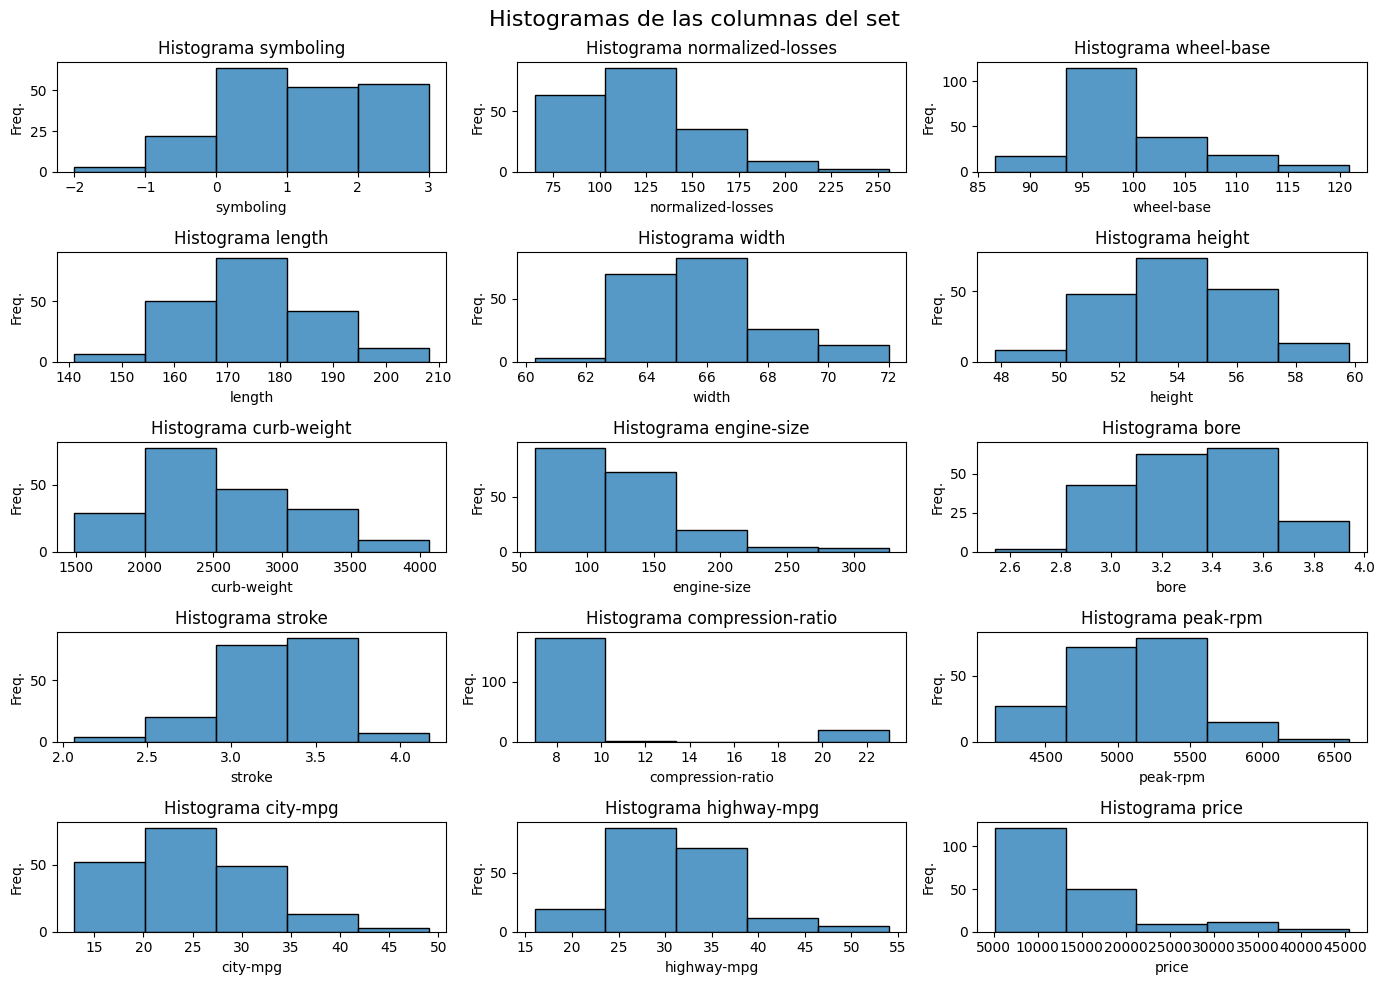

In [19]:
from utils import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), title="Histogramas de las columnas del set")

Ahora buscamos valores nulos en el dataframe

In [20]:
from utils import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
symboling,195,0,0.0
normalized-losses,195,0,0.0
make,195,0,0.0
fuel-type,195,0,0.0
aspiration,195,0,0.0
num-of-doors,195,0,0.0
body-style,195,0,0.0
drive-wheels,195,0,0.0
engine-location,195,0,0.0
wheel-base,195,0,0.0


No encontramos valores nulos en nuestro dataset

Ahora buscamos valores duplicados

In [21]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No existen valores duplicados.

Ahora veremos si existen outliers y los analizaremos en caso de que hayan

In [22]:
from utils import get_outliers_data
get_outliers_data(df)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price
N° Outliers,0.0,4.000000,3.000000,0.000,7.000000,0.000,0.00,7.000000,0.00,18.000000,27.000000,2.000000,2.000000,2.000000,14.000000
% Outliers,0.0,2.051282,1.538462,0.000,3.589744,0.000,0.00,3.589744,0.00,9.230769,13.846154,1.025641,1.025641,1.025641,7.179487
Lim. mix,-3.0,38.000000,82.650000,139.675,59.775000,46.525,947.25,26.750000,2.49,2.660000,7.150000,3750.000000,3.750000,10.000000,-5372.250000
Lim. max,5.0,194.000000,114.250000,210.675,71.175000,61.125,4141.25,216.750000,4.25,3.860000,10.750000,6550.000000,45.750000,50.000000,29637.750000


Graficamos los botplox para contrastar

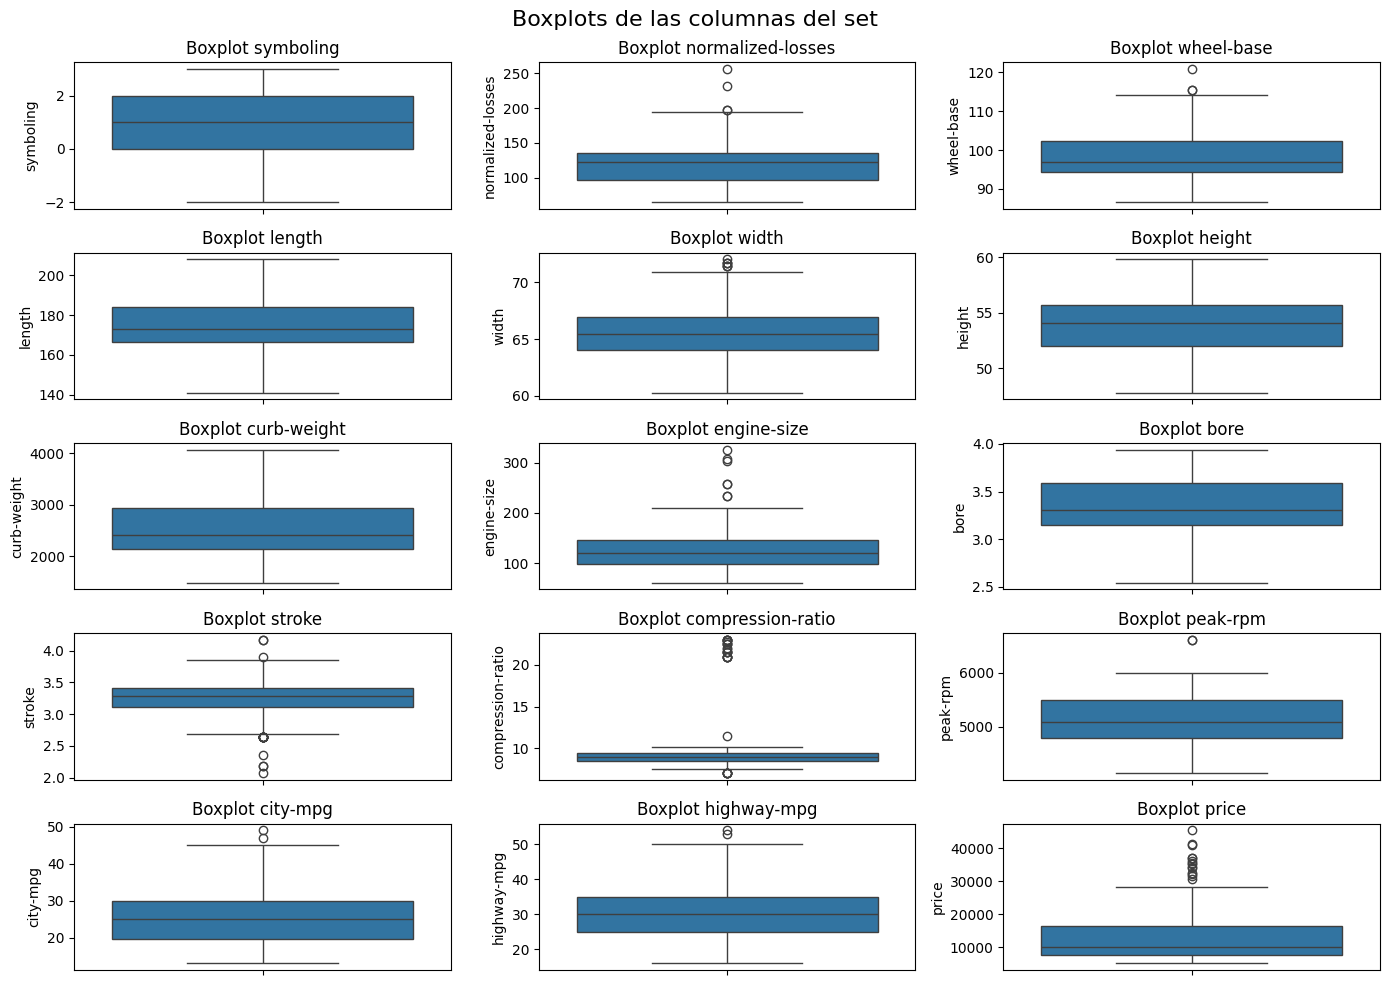

In [23]:
from utils import graph_boxplot
graph_boxplot(df, get_numeric_columns(df), title="Boxplots de las columnas del set")

Ahora veremos el análisis y correlación entre variables

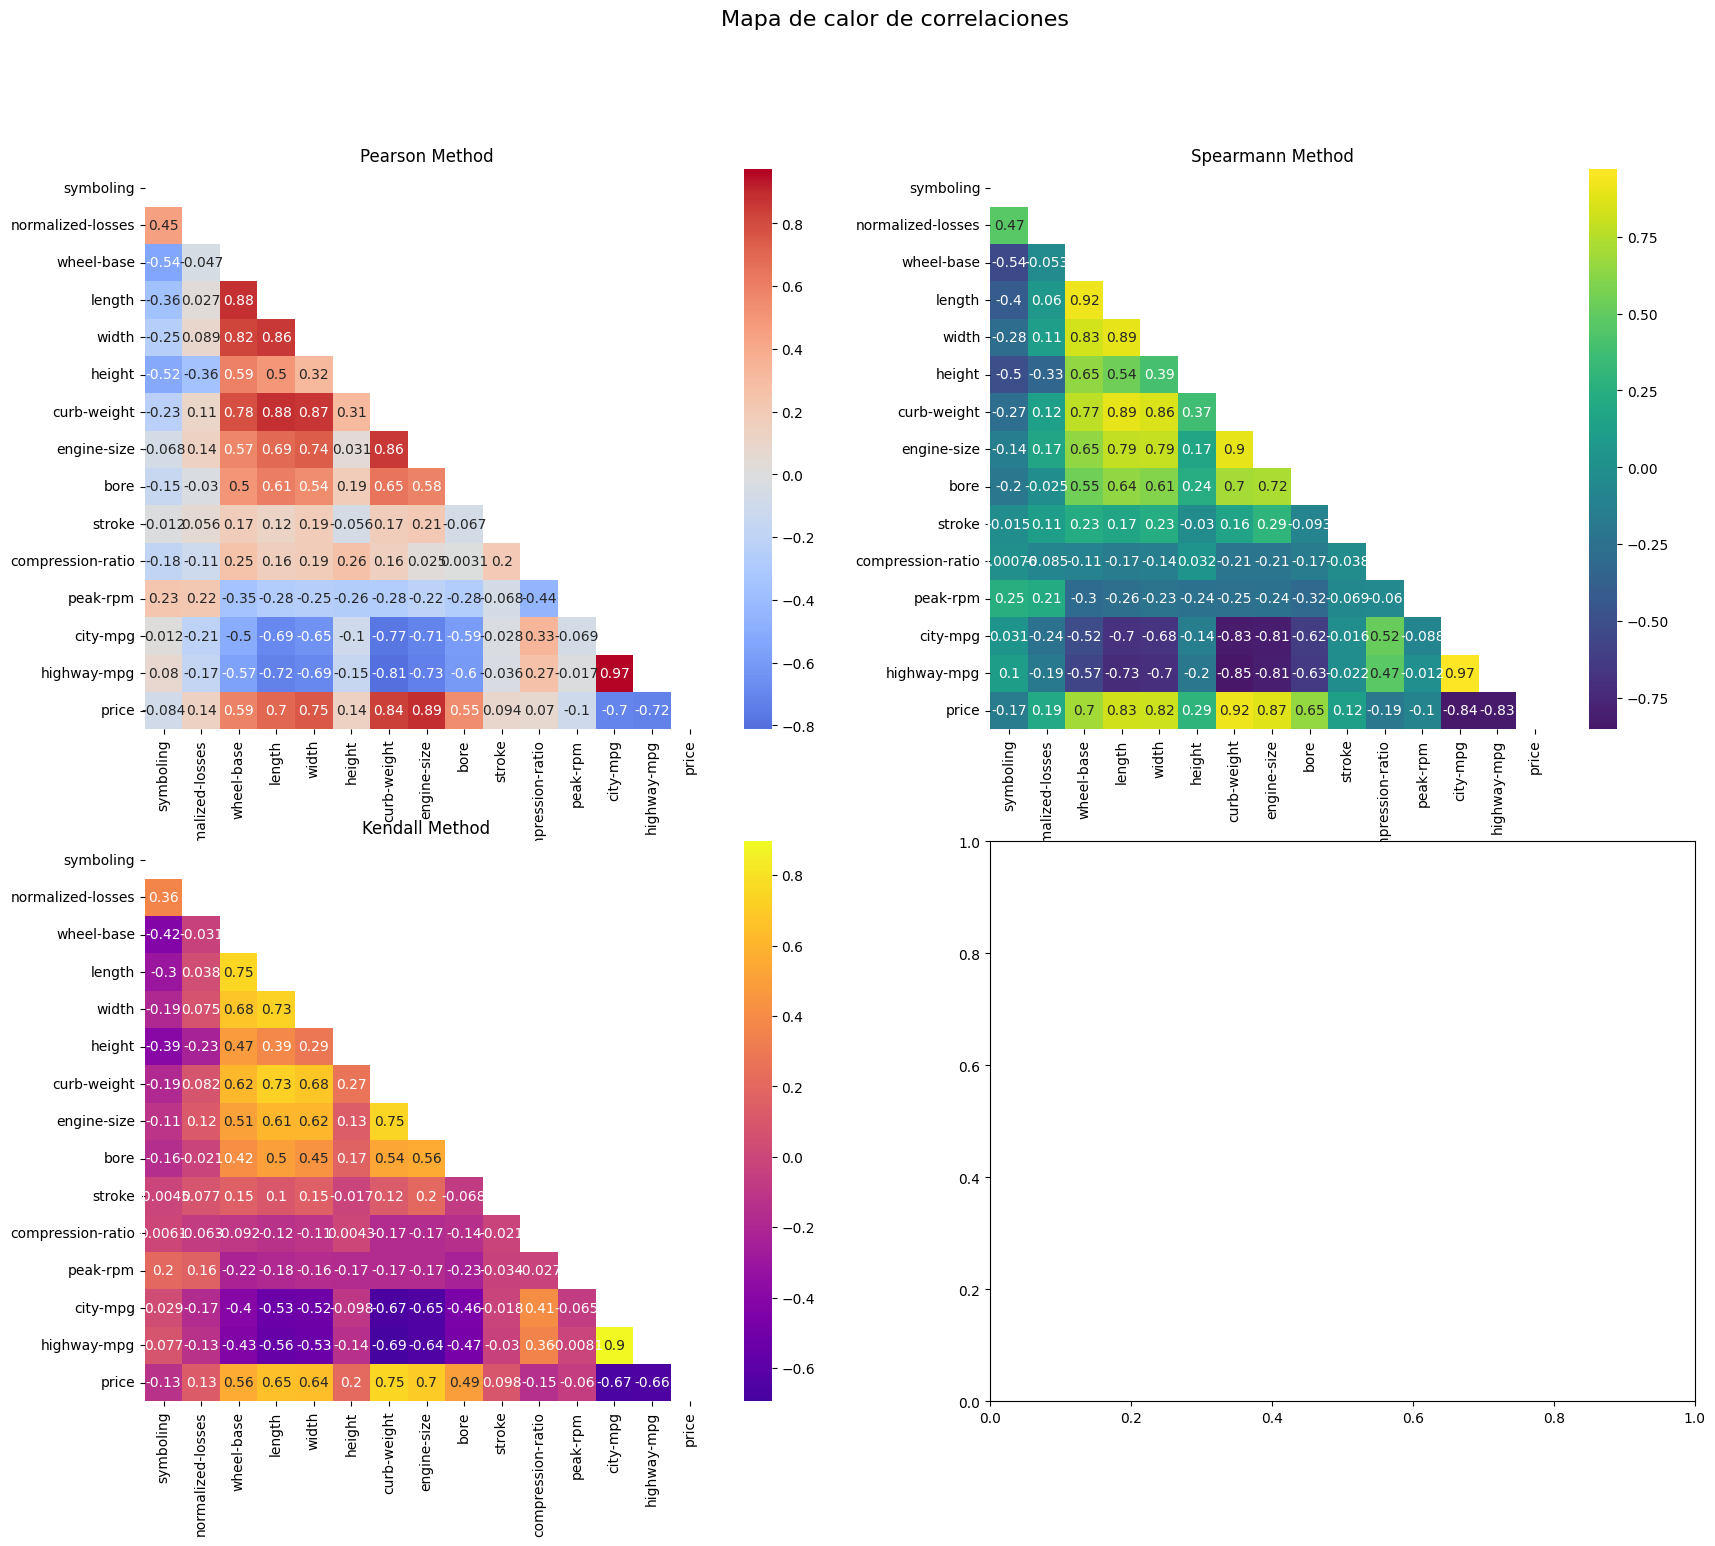

In [24]:
from utils import graph_correlations
correlation_matrix = df[get_numeric_columns(df)].corr(method='pearson')
spearman_corr = df[get_numeric_columns(df)].corr(method='spearman')
kendall_corr = df[get_numeric_columns(df)].corr(method='kendall')
graph_correlations(correlation_matrix, spearman_corr, kendall_corr, title="Mapa de calor de correlaciones", figsize=(20, 16))


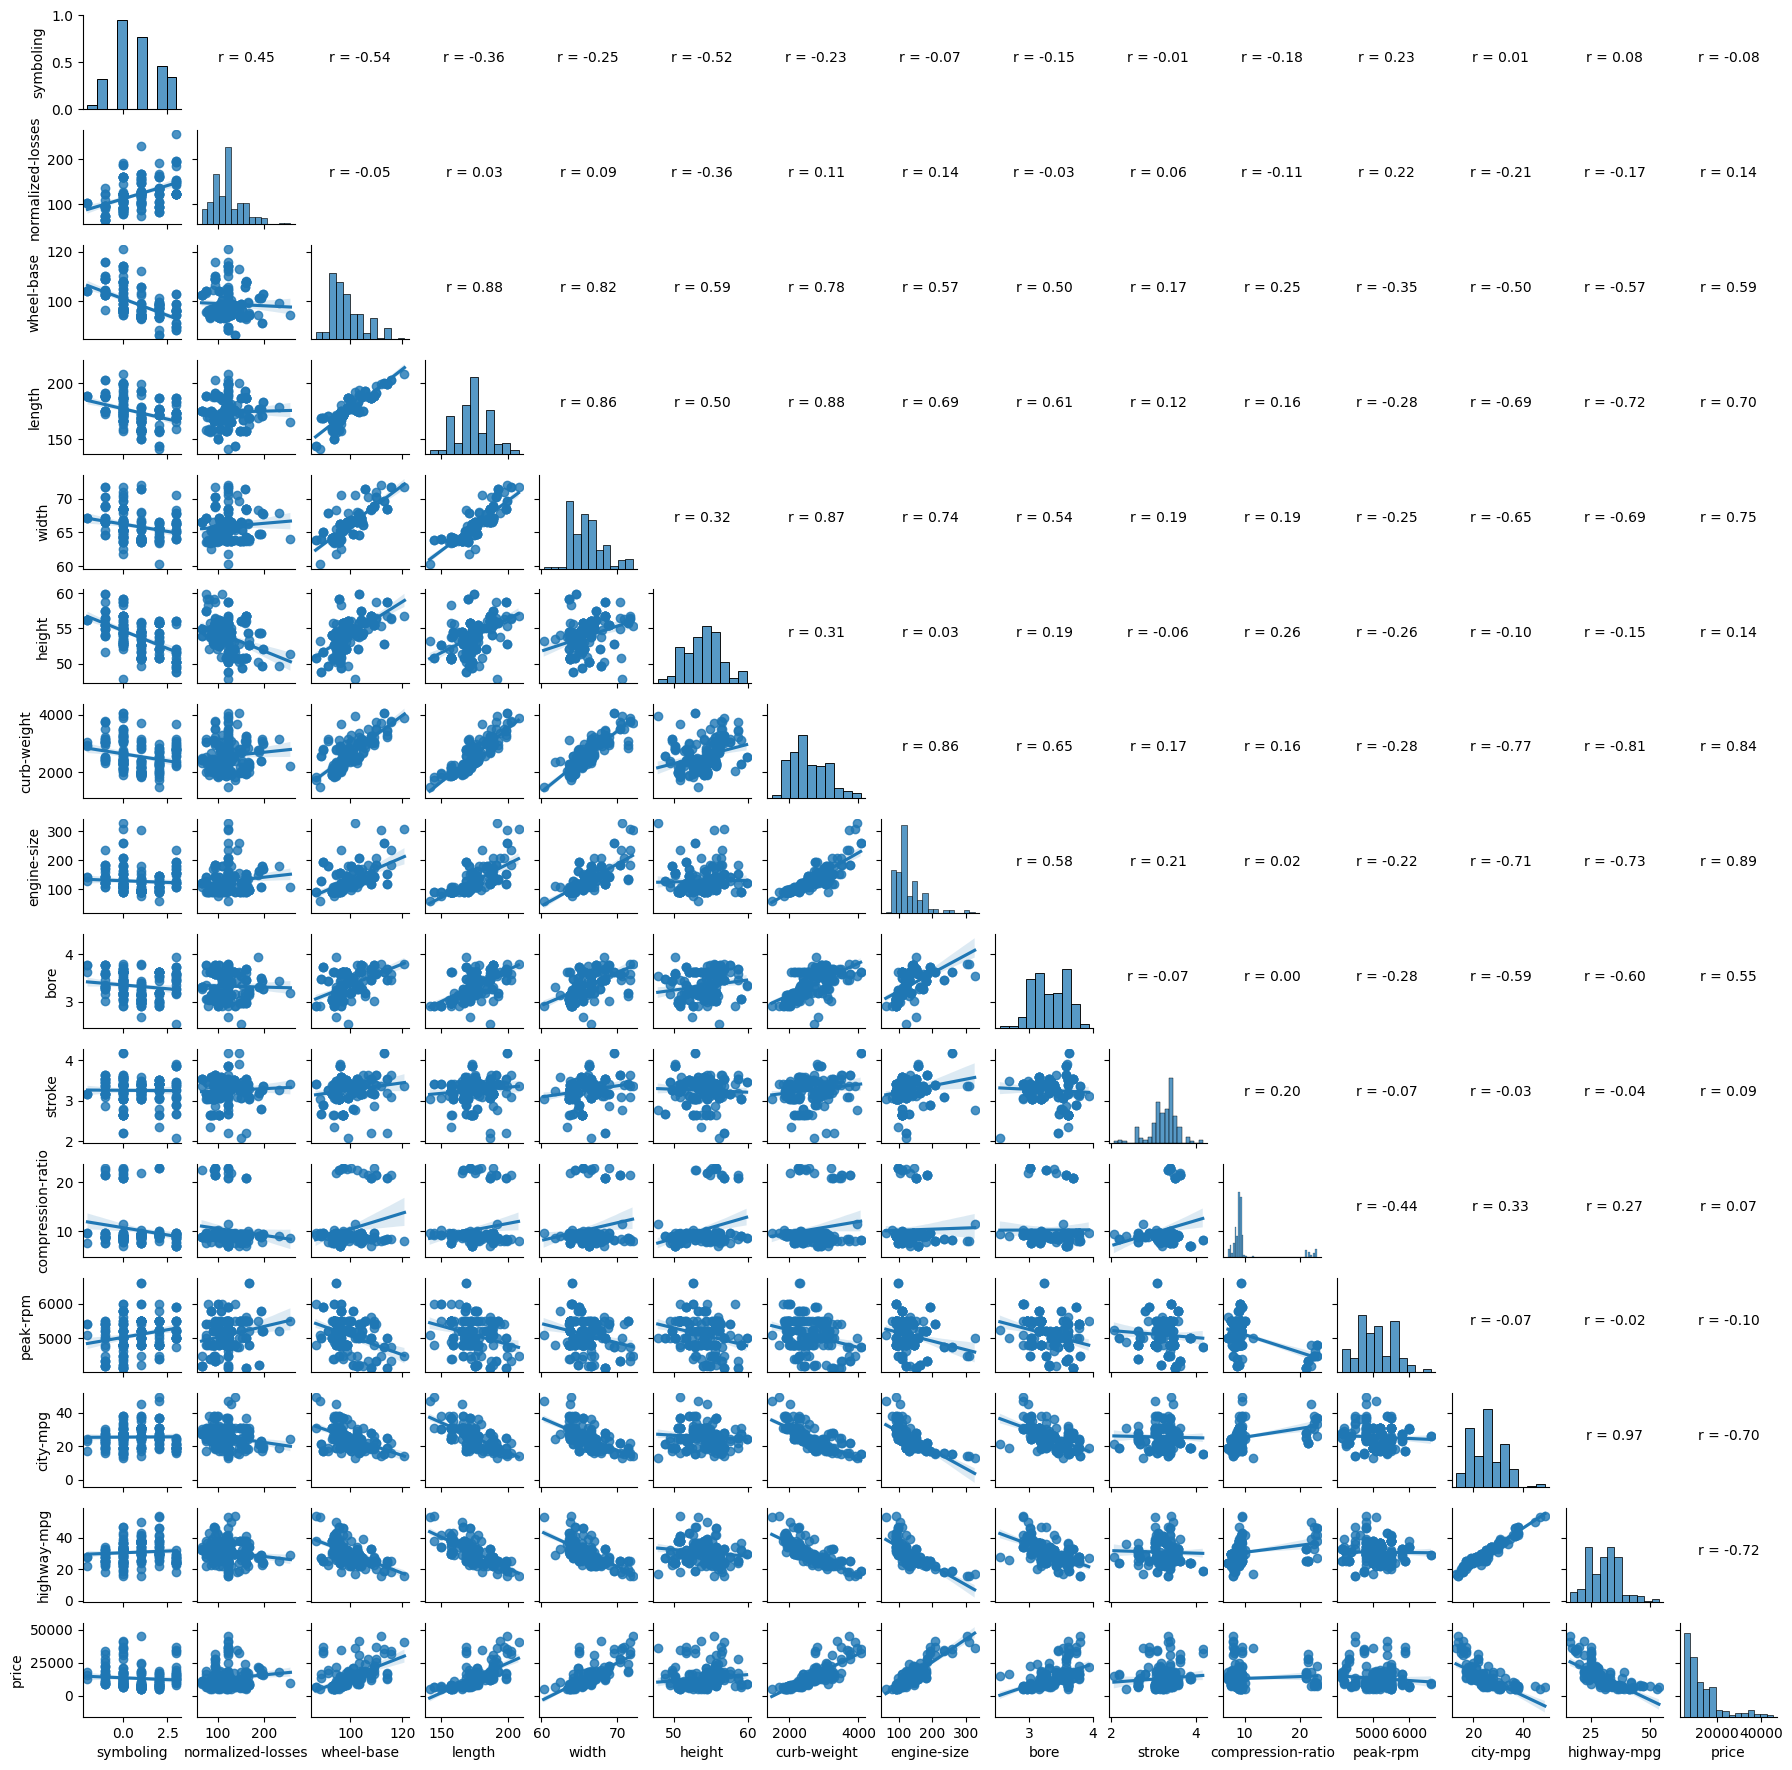

In [25]:
import seaborn as sns
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()
palette = sns.color_palette("Spectral")
g = sns.PairGrid(df, height=1.2)
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)
plt.show()

## Preparamos los datos para crear el modelo

In [26]:
from sklearn.model_selection import train_test_split
predict_numeric_columns = [
    "wheel-base",
    "length",
    "width", 
    "curb-weight",
    "engine-size",
    "horsepower",
    "city-mpg",
    "highway-mpg",
]
predict_categoric_columns = [
    "make",
    "fuel-type",
    "num-of-doors",
    "engine-type",
    "fuel-system",
]
X = X = df[[*predict_numeric_columns] + [*predict_categoric_columns]]
y = df['price']

In [27]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Escalado de datos

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", scaler, predict_numeric_columns),
        ("cat", categorical_transformer, predict_categoric_columns),
    ]
)

X_transformed = preprocessor.fit_transform(X)


scaler = StandardScaler()
X_train = X_transformed
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed,
    y,
    test_size=0.2,
    random_state=0,
)

### Regresion lineal

In [28]:
from sklearn.linear_model import LinearRegression

lineal_reg_model = LinearRegression()
lineal_reg_model.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

# Realizar predicciones
y_pred_reg_lineal = lineal_reg_model.predict(X_test)

# Evaluar el modelo
rmse_reg_lineal = root_mean_squared_error(y_test, y_pred_reg_lineal)
mse_reg_lineal = rmse_reg_lineal ** 2
r2_reg_lineal = r2_score(y_test, y_pred_reg_lineal)
mae_reg_lineal = mean_absolute_error(y_test, y_pred_reg_lineal)

print(f'Error Cuadrático Medio: {mse_reg_lineal}')
print(f'Error Cuadrático Medio Raíz: {rmse_reg_lineal}')
print(f'R-cuadrado: {r2_reg_lineal}')
print(f'Error Absoluto Medio: {mae_reg_lineal}')

Error Cuadrático Medio: 3540386.9514665375
Error Cuadrático Medio Raíz: 1881.5916006048012
R-cuadrado: 0.9501168244688807
Error Absoluto Medio: 1370.4774398228603


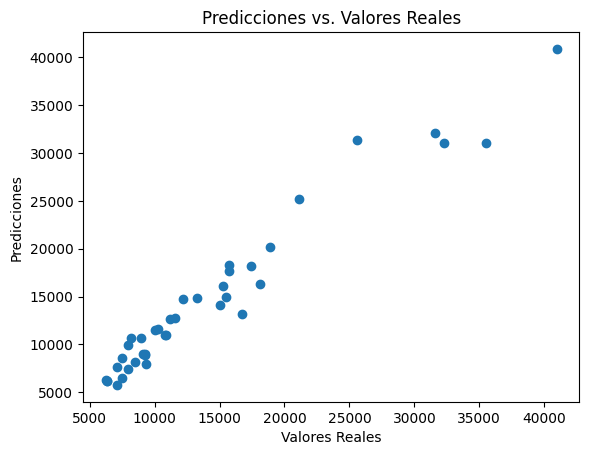

In [30]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred_reg_lineal)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

### Arbol de decisiones

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Entrenamiento del modelo Árbol de Decisión
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)

# Realizar predicciones
y_pred = tree.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 4233546.948717949
R-cuadrado: 0.9403503717370064


In [32]:
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
# Realizar predicciones
y_pred_pruned = tree.predict(X_test)

# Evaluar el modelo podado
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
r2_pruned = r2_score(y_test, y_pred_pruned)
print(f'Error Cuadrático Medio (Podado): {mse_pruned}')
print(f'R-cuadrado (Podado): {r2_pruned}')

Error Cuadrático Medio (Podado): 4233546.948717949
R-cuadrado (Podado): 0.9403503717370064


In [33]:
# Realizar predicciones
y_pred_tree = tree.predict(X_test)

# Evaluar el modelo
rmse_tree = root_mean_squared_error(y_test, y_pred_tree)
mse_tree = rmse_tree ** 2
r2_tree = r2_score(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)

print(f'Error Cuadrático Medio: {mse_tree}')
print(f'Error Cuadrático Medio Raíz: {rmse_tree}')
print(f'R-cuadrado: {r2_tree}')
print(f'Error Absoluto Medio: {mae_tree}')

Error Cuadrático Medio: 4233546.948717949
Error Cuadrático Medio Raíz: 2057.558492174147
R-cuadrado: 0.9403503717370064
Error Absoluto Medio: 1401.2051282051282


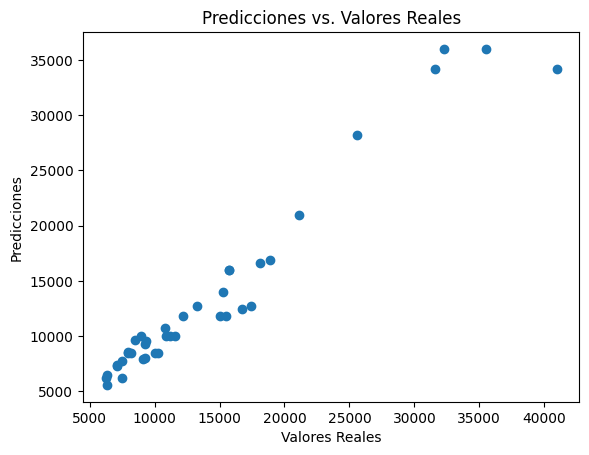

In [34]:
plt.scatter(y_test, y_pred_tree)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

KNN

Buscamos el mejor valor de K para nuestro modelo

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    mse_scores.append(scores.mean())
best_k = k_values[mse_scores.index(max(mse_scores))]
print(f'Mejor valor de K: {best_k}')

Mejor valor de K: 2


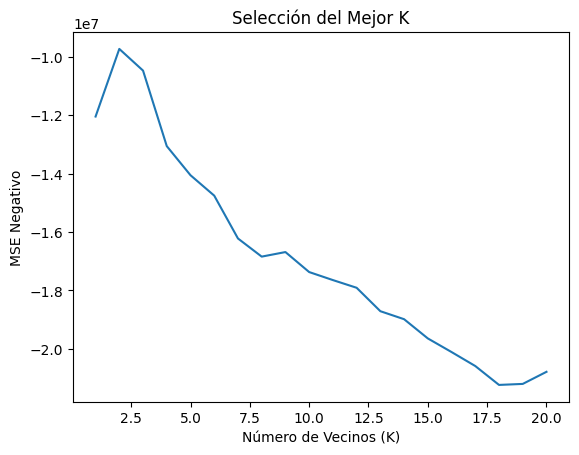

In [45]:
import matplotlib.pyplot as plt

plt.plot(k_values, mse_scores)
plt.xlabel('Número de Vecinos (K)')
plt.ylabel('MSE Negativo')
plt.title('Selección del Mejor K')
plt.show()

In [50]:
# Entrenamiento del modelo KNN
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [51]:
# Realizar predicciones
y_pred_knn = knn.predict(X_test)
# Evaluar el modelo
rmse_knn = root_mean_squared_error(y_test, y_pred_knn)
mse_knn = rmse_knn ** 2
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f'Error Cuadrático Medio: {mse_knn}')
print(f'Error Cuadrático Medio Raíz: {rmse_knn}')
print(f'R-cuadrado: {r2_knn}')
print(f'Error Absoluto Medio: {mae_knn}')

Error Cuadrático Medio: 4000816.801282051
Error Cuadrático Medio Raíz: 2000.2041898971343
R-cuadrado: 0.9436294818893922
Error Absoluto Medio: 1580.2692307692307


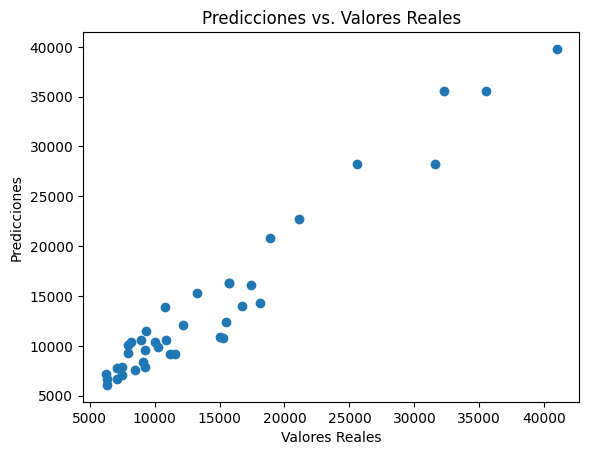

In [52]:
plt.scatter(y_test, y_pred_knn)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

Benchmarking

In [53]:
df_results = pd.DataFrame([
    ("Regresión Lineal", r2_reg_lineal, rmse_reg_lineal, mse_reg_lineal, mae_reg_lineal),
    ("KNN", r2_knn, rmse_knn, mse_knn, mae_knn),
    ("Árbol de Decisión", r2_tree, rmse_tree, mse_tree, mae_tree),
], columns=["Método", "R2", "RMSE", "MSE", "MAE"])

df_results

,Método,R2,RMSE,MSE,MAE
0,Regresión Lineal,0.950117,1881.591601,3.540387e+06,1370.477440
1,KNN,0.943629,2000.204190,4.000817e+06,1580.269231
2,Árbol de Decisión,0.940350,2057.558492,4.233547e+06,1401.205128


Se observa que:
- La regresion lineal tiene mayor R2, por lo tanto es el de mayor precision

Recomendaciones

- Se podria variar los parametros de los modelos (por ejemplo podar el arbol, etc)
- Se puede trabajar en variar las columnas a utilizar para visualizar como influye en cada modelo